In [3]:
import numpy as np
import pandas as pd


In [8]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [10]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<AxesSubplot:>

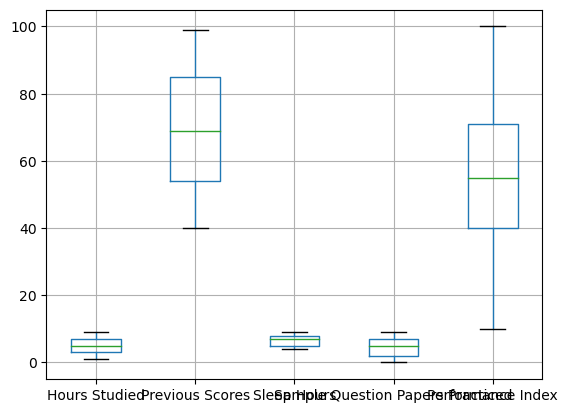

In [12]:
data.boxplot()

###There is no outliers in this dataset.

# ENCODING

#As we know we don't have any inherent in column Extracurricular Activities. so we will use one-hot coding.


In [18]:
#convert gender column using one hot encoding 
new_data = pd.get_dummies(data, columns=['Extracurricular Activities'], prefix='Extracurricular Activities')

# Display the DataFrame after one-hot encoding
print(new_data)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  Performance Index  \
0                                    1                 91   
1                                    2                 65   
2                                    2                 45   
3                                    2                 36   
4                                    5                 66 

# Spliting data 

In [28]:
X = new_data.drop(["Performance Index"], axis=1)
y = new_data["Performance Index"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [31]:
new_data['Performance Index'].describe()

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64

# linear regression 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('root mean square error:', rmse)
print('r2:', r2*100)

root mean square error: 2.0205515085050063
r2: 98.89832909573146


# Ridge Regression


root mean square error: 2.020552496156981
r2: 98.89832801873072
6252    51
4684    20
1731    46
4742    28
4521    41
6340    59
576     48
5202    87
6363    37
439     73
2750    66
7487    30
5272    61
5653    45
3999    52
6033    41
582     63
9930    78
7051    63
8158    42
Name: Actual, dtype: int64


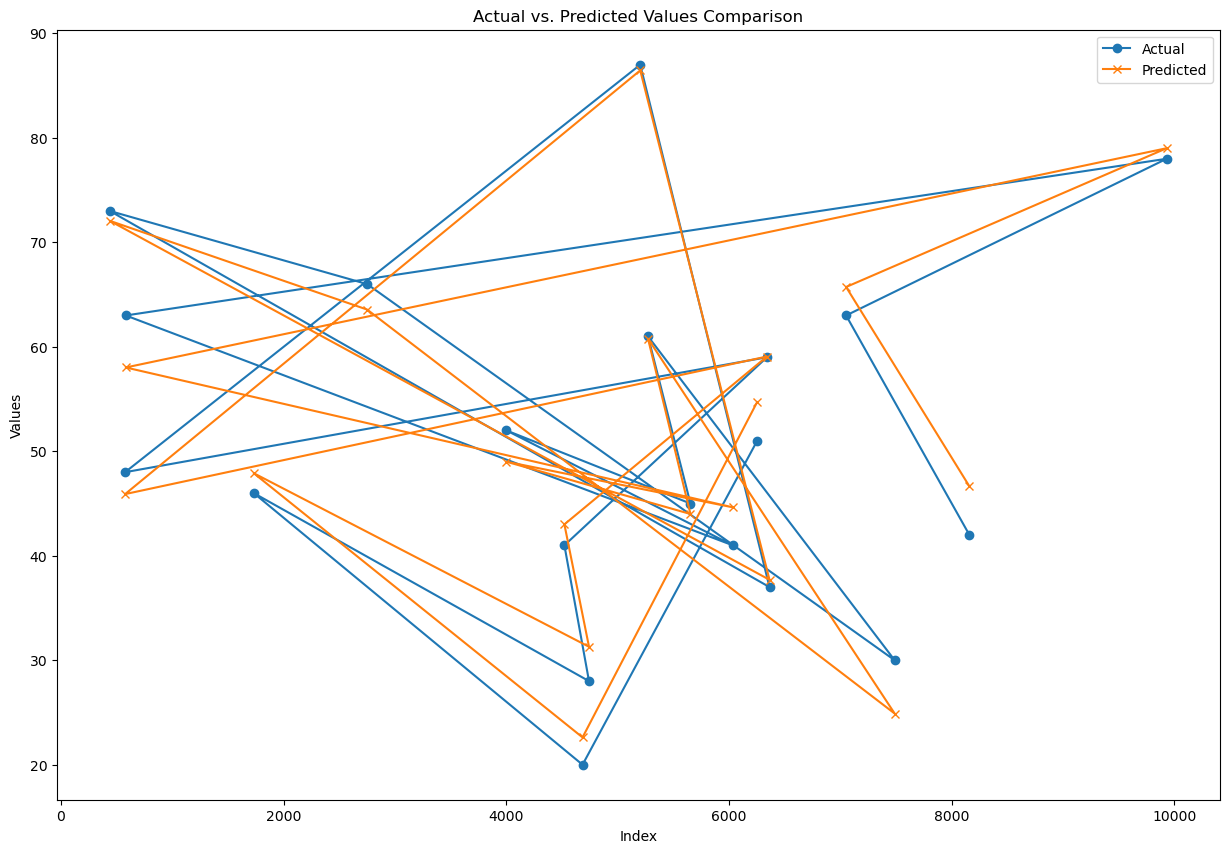

In [75]:
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

model1 = Ridge(alpha=0.5)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('root mean square error:', rmse)
print('r2:', r2*100)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
first_10_actual = comparison_df['Actual'].head(20)
first_10_predicted = comparison_df['Predicted'].head(20)
print(first_10_actual)

# Plot a line chart of actual vs. predicted values
plt.figure(figsize=(15, 10))
plt.plot(first_10_actual, label='Actual', marker='o')
plt.plot(first_10_predicted, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values Comparison')
plt.legend()
plt.show()

# Random forest 

In [52]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R-squared scores
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2*100)


Root Mean Squared Error (RMSE): 2.270596543201716
R-squared (R2) Score: 98.60879230184744


In [56]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Print the DataFrame
print(comparison_df)
# comparison_df.head()

      Actual  Predicted
6252      51  54.711854
4684      20  22.615513
1731      46  47.903145
4742      28  31.289767
4521      41  43.004570
...      ...        ...
6412      45  46.886280
8285      66  62.698025
7853      16  16.793420
1095      65  63.343274
6929      47  45.942623

[2000 rows x 2 columns]


In [ ]:
Conclusion: 